In [18]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import acquire

## Acquire the data

In [2]:
df = acquire.get_joined()

In [3]:
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_date      913000 non-null  object 
 2   sale_id        913000 non-null  int64  
 3   store_address  913000 non-null  object 
 4   store_city     913000 non-null  object 
 5   store_id       913000 non-null  int64  
 6   store_state    913000 non-null  object 
 7   store_zipcode  913000 non-null  int64  
 8   item_brand     913000 non-null  object 
 9   item_id        913000 non-null  int64  
 10  item_name      913000 non-null  object 
 11  item_price     913000 non-null  float64
 12  item_upc12     913000 non-null  int64  
 13  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


In [5]:
df.isnull().sum()


sale_amount      0
sale_date        0
sale_id          0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
dtype: int64

### Convert date column to datetime format.

In [6]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

In [7]:
df.head()

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,2013-01-01 00:00:00+00:00,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,2013-01-02 00:00:00+00:00,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,2013-01-03 00:00:00+00:00,3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,13.0,2013-01-04 00:00:00+00:00,4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,10.0,2013-01-05 00:00:00+00:00,5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### Plot the distribution of sale_amount and item_price.

Text(0, 0.5, 'Sale Amount - Items Sold')

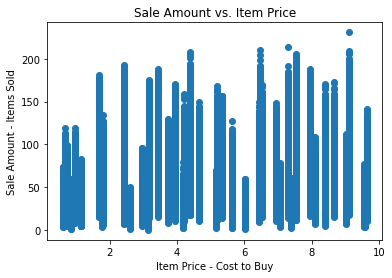

In [8]:
plt.scatter(y=df.sale_amount, x=df.item_price)
plt.title('Sale Amount vs. Item Price')
plt.xlabel('Item Price - Cost to Buy')
plt.ylabel('Sale Amount - Items Sold')

### Set the index to be the datetime variable.

In [9]:
# Sort rows by the date and then set the index as that date
df = df.set_index("sale_date").sort_index()

### Add a 'month' and 'day of week' column to your dataframe.

In [10]:
df['month'] = df.index.month

df['weekday'] = df.index.day_name()

df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday


### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [11]:
df['sales_total'] = df.sale_amount * df.item_price

In [12]:
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00


### Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def set_index(df, date_col):
    '''
    Converts column to datetime and sets as the index
    '''
    df[date_col] = pd.to_datetime(df[date_col])
    
    df = df.set_index(date_col).sort_index()
    
    return df

def visualize(df, x, y, title):
    '''
    plots a scatter plot of x vs y, and then a pairplot of the complete df
    '''

    plt.scatter(x=x, y=y)
    plt.title('title')
    plt.show()
    
    sns.pairplot(df)
    
def create_date_columns(df, date_types, date_col):
    '''
    'year','month','day','hour','week','weekday','weekday_name','quarter'
    create columns of these date types using date index or column
    date_col must be set to a pandas datetime
    '''
    
    # if date columns has already been set to index
    if date_col == 'index':
        for x in date_types:
            
            # will add the date column for every date type in the list
            if x == 'year':
                df['year'] = df.index.year
                
            if x == 'month':
                df['month'] = df.index.month
                
            if x == 'day':
                df['day'] = df.index.day
                
            if x == 'hour':
                df['hour'] = df.index.hour
                
            if x == 'week':
                df['week'] = df.index.week
                
            if x == 'weekday':
                df['weekday'] = df.index.weekday
                
            if x == 'weekday_name':
                df['weekday_name'] = df.index.day_name()
                
            if x == 'quarter':
                df['quarter'] = df.index.quarter
                
    # if date column has not yet been set to index
    else:
        for x in date_types:
            
            # will add the date column for every date type in the list
            if x == 'year':
                df['year'] = df[date_col].dt.year
                
            if x == 'month':
                df['month'] = df[date_col].dt.month
                
            if x == 'day':
                df['day'] = df[date_col].dt.day
                
            if x == 'hour':
                df['hour'] = df[date_col].dt.hour
                
            if x == 'week':
                df['week'] = df[date_col].dt.week
                
            if x == 'weekday':
                df['weekday'] = df[date_col].dt.weekday
                
            if x == 'weekday_name':
                df['weekday_name'] = df[date_col].dt.day_name()
                
            if x == 'quarter':
                df['quarter'] = df[date_col].dt.quarter
    
    return df
    
def sales_total():
    '''
    creates a new column for sales total
    '''
    df['sales_total'] = df.sale_amount * df.item_price
    
    return df

## Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

In [13]:
ops_df = acquire.get_open_power_data()

In [14]:
ops_df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [15]:
ops_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 205.5+ KB


### Convert date column to datetime format.

In [16]:
# Reassign the sale_date column to be a datetime type
ops_df.Date = pd.to_datetime(ops_df.Date)

### Plot the distribution of each of your variables.

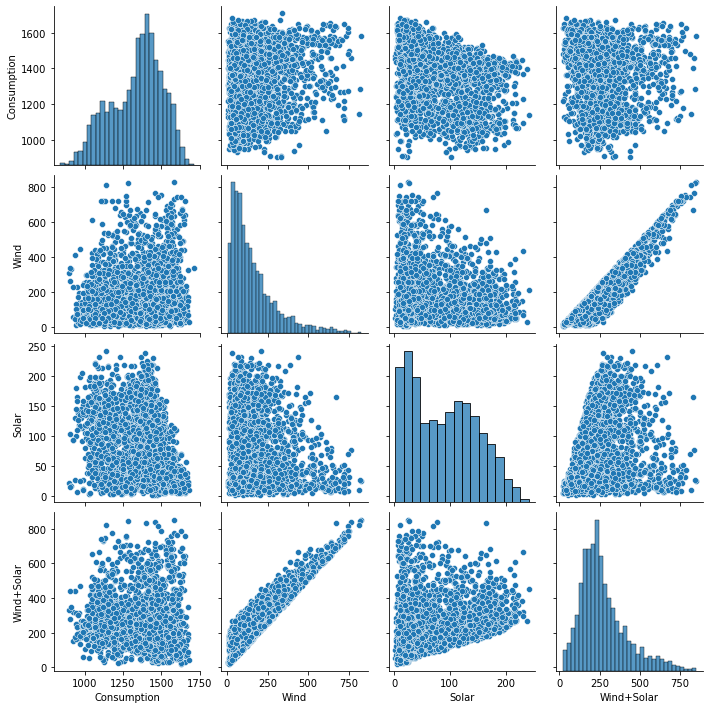

In [19]:
sns.pairplot(ops_df)


### Set the index to be the datetime variable.

In [20]:
# Sort rows by the date and then set the index as that date
ops_df = ops_df.set_index("Date").sort_index()

In [21]:
ops_df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### Add a month and a year column to your dataframe.

In [22]:
ops_df['month'] = ops_df.index.month

ops_df['year'] = ops_df.index.year

ops_df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


### Fill any missing values.

In [23]:
ops_df = ops_df.fillna(0)

In [24]:
ops_df.isnull().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
month          0
year           0
dtype: int64

In [25]:
ops_df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006
